<a href="https://colab.research.google.com/github/Shoebtamboli/COVID-19-Analysis/blob/master/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook we will do covid-19 visualization


1.   Web scraping with lxml.html and BeautifulSoup from the worldoMeter site
2.   Storing data with pandas
3.   Visualization

In [0]:
from bs4 import BeautifulSoup
import urllib.request
import lxml.html as lh
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
page = requests.get('https://www.worldometers.info/coronavirus/#countries')
page.content

In [3]:
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')

print(tr_elements)

#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

[<Element tr at 0x7fe608a3ad68>, <Element tr at 0x7fe608a3adb8>, <Element tr at 0x7fe608a3af98>, <Element tr at 0x7fe608a43048>, <Element tr at 0x7fe608a43098>, <Element tr at 0x7fe608a430e8>, <Element tr at 0x7fe608a43138>, <Element tr at 0x7fe608a43188>, <Element tr at 0x7fe608a431d8>, <Element tr at 0x7fe608a43228>, <Element tr at 0x7fe608a43278>, <Element tr at 0x7fe608a432c8>, <Element tr at 0x7fe608a43318>, <Element tr at 0x7fe608a43368>, <Element tr at 0x7fe608a433b8>, <Element tr at 0x7fe608a43408>, <Element tr at 0x7fe608a43458>, <Element tr at 0x7fe608a434a8>, <Element tr at 0x7fe608a434f8>, <Element tr at 0x7fe608a43548>, <Element tr at 0x7fe608a43598>, <Element tr at 0x7fe608a435e8>, <Element tr at 0x7fe608a43638>, <Element tr at 0x7fe608a43688>, <Element tr at 0x7fe608a436d8>, <Element tr at 0x7fe608a43728>, <Element tr at 0x7fe608a43778>, <Element tr at 0x7fe608a437c8>, <Element tr at 0x7fe608a43818>, <Element tr at 0x7fe608a43868>, <Element tr at 0x7fe608a438b8>, <Elemen

In [0]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=19:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1


In [7]:
[len(C) for (title,C) in col]

[695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695]

In [0]:
Dict={title:column for (title,column) in col}

df = pd.DataFrame(Dict)

In [9]:
df.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,,\nNorth America\n,"2,155,255","+7,700","130,025","+1,188","841,063","+3,412","1,184,167","19,329",,,,,,North America,\n,,
1,,\nSouth America\n,"989,431","+3,707","44,358",84,"470,937","+4,923","474,136","11,404",,,,,,South America,\n,,
2,,\nEurope\n,"2,040,216","+11,975","176,706",261,"1,040,540","+12,686","822,970","8,524",,,,,,Europe,\n,,
3,,\nAsia\n,"1,250,159","+23,528","32,774",309,"760,026","+11,518","457,359","14,537",,,,,,Asia,\n,,
4,,\nAfrica\n,"166,091","+1,106","4,641",14,"72,915",535,"88,535",444,,,,,,Africa,\n,,
5,,\nOceania\n,"8,850",11,124,,"8,230",8,496,4,,,,,,Australia/Oceania,\n,,
6,,\n\n,721,,15,,651,,55,4,,,,,,,\n,,
7,,World,"6,610,723","+48,027","388,643","+1,856","3,194,362","+33,082","3,027,718","54,246",848,49.9,,,,All,\n,,
8,1,USA,"1,905,012","+3,229","109,204",62,"688,917",247,"1,106,891","16,947","5,758",330,"19,129,044","57,816","330,859,357",North America,174,"3,030",17
9,2,Brazil,"587,017","+3,037","32,602",55,"266,132",,"288,283","8,318","2,763",153,"930,013","4,378","212,446,884",South America,362,"6,516",228


In [10]:
df.tail(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
685,214,Lesotho,2,,,,1,,1,,0.9,,283,132,"2,140,977",Africa,"1,070,489",,"7,565"
686,215,Saint Pierre Miquelon,1,,,,1,,0,,173,,,,"5,796",North America,"5,796",,
687,,Total:,"1,194,227","+30,432","31,831",561,"730,890","+17,977","431,506","14,487",,,,,,Asia,,,
688,,Total:,"2,120,786","+26,773","127,154","+1,486","791,134","+34,683","1,202,498","19,481",,,,,,North America,,,
689,,Total:,"945,730","+39,052","42,658","+1,568","394,659","+32,382","508,413","11,404",,,,,,South America,,,
690,,Total:,"2,011,149","+14,010","175,557",903,"1,013,054","+19,098","822,538","8,722",,,,,,Europe,,,
691,,Total:,"159,838","+4,931","4,520",151,"68,985","+3,054","86,333",425,,,,,,Africa,,,
692,,Total:,"8,831",17,124,,"8,208",,499,4,,,,,,Australia/Oceania,,,
693,,Total:,721,,15,,651,,55,4,,,,,,,,,
694,,Total:,"6,441,282","+115,215","381,859","+4,669","3,007,581","+107,201","3,051,842","54,527",826.4,49.0,,,,All,\n,,


In [11]:
# Remove the duplicated column

country_df = df[8:687]
country_df = country_df.set_index(['#'])
country_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
#,,,,,,,,,,,,,,,,,,
1,USA,"1,905,012","+3,229","109,204",62,"688,917",247,"1,106,891","16,947","5,758",330,"19,129,044","57,816","330,859,357",North America,174,"3,030",17
2,Brazil,"587,017","+3,037","32,602",55,"266,132",,"288,283","8,318","2,763",153,"930,013","4,378","212,446,884",South America,362,"6,516",228
3,Russia,"441,108","+8,831","5,384",169,"204,623","+8,666","231,101","2,300","3,023",37,"11,733,051","80,402","145,930,019",Europe,331,"27,104",12
4,Spain,"287,406",,"27,128",,N/A,N/A,N/A,617,"6,147",580,"4,063,843","86,921","46,753,492",Europe,163,"1,723",12
5,UK,"279,856",,"39,728",,N/A,N/A,N/A,"1,559","4,124",585,"4,786,219","70,531","67,859,798",Europe,242,"1,708",14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Caribbean Netherlands,7,,,,7,,0,,267,,424,"16,180","26,205",North America,"3,744",,62
212,St. Barth,6,,,,6,,0,,608,,137,"13,873","9,875",North America,"1,646",,72
213,Anguilla,3,,,,3,,0,,200,,41,"2,735","14,993",North America,"4,998",,366


In [12]:
# rename column name
country_df = country_df.rename(columns={"Country,Other":"Country", "Serious,Critical": "SeriousCases"})
country_df

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
#,,,,,,,,,,,,,,,,,,
1,USA,"1,905,012","+3,229","109,204",62,"688,917",247,"1,106,891","16,947","5,758",330,"19,129,044","57,816","330,859,357",North America,174,"3,030",17
2,Brazil,"587,017","+3,037","32,602",55,"266,132",,"288,283","8,318","2,763",153,"930,013","4,378","212,446,884",South America,362,"6,516",228
3,Russia,"441,108","+8,831","5,384",169,"204,623","+8,666","231,101","2,300","3,023",37,"11,733,051","80,402","145,930,019",Europe,331,"27,104",12
4,Spain,"287,406",,"27,128",,N/A,N/A,N/A,617,"6,147",580,"4,063,843","86,921","46,753,492",Europe,163,"1,723",12
5,UK,"279,856",,"39,728",,N/A,N/A,N/A,"1,559","4,124",585,"4,786,219","70,531","67,859,798",Europe,242,"1,708",14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Caribbean Netherlands,7,,,,7,,0,,267,,424,"16,180","26,205",North America,"3,744",,62
212,St. Barth,6,,,,6,,0,,608,,137,"13,873","9,875",North America,"1,646",,72
213,Anguilla,3,,,,3,,0,,200,,41,"2,735","14,993",North America,"4,998",,366


In [0]:
# drop the columns
country_df = country_df.drop(columns= ['Deaths/1M pop'])
country_df = country_df.drop(columns= ['Continent'])
country_df = country_df.drop(columns= ['Tests/\n1M pop\n'])
#country_df = country_df.drop(columns= ['Tot\xa0Cases/1M pop'])

In [0]:
country_df['Tot\xa0Cases/1M pop']
country_df = country_df.rename(columns={'Tot\xa0Cases/1M pop':"Country11"})
country_df = country_df.drop(columns= ['Country11'])

In [16]:
country_df.head(5)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCases,TotalTests,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
#,,,,,,,,,,,,,,
1,USA,"1,905,012","+3,229","109,204",62,"688,917",247,"1,106,891","16,947","19,129,044","330,859,357",174,"3,030",17
2,Brazil,"587,017","+3,037","32,602",55,"266,132",,"288,283","8,318","930,013","212,446,884",362,"6,516",228
3,Russia,"441,108","+8,831","5,384",169,"204,623","+8,666","231,101","2,300","11,733,051","145,930,019",331,"27,104",12
4,Spain,"287,406",,"27,128",,N/A,N/A,N/A,617,"4,063,843","46,753,492",163,"1,723",12
5,UK,"279,856",,"39,728",,N/A,N/A,N/A,"1,559","4,786,219","67,859,798",242,"1,708",14


In [0]:
select_country = country_df.loc[country_df['Country'] == 'India']

In [35]:
select_country

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCases,TotalTests,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
#,,,,,,,,,,,,,,
7,India,"219,311","+2,487","6,130",42,"105,013",942,"108,168","8,944","4,242,718","1,378,974,417","6,288","224,955",325
8,India,"216,824","+9,633","6,088",259,"104,071","+3,786","106,665","8,944","4,103,233","1,378,974,417","6,360","226,507",336
8,India,"207,191","+8,821","5,829",221,"100,285","+4,531","101,077","8,944","3,966,075","1,378,974,417","6,656","236,571",348


In [0]:
# Even index today's cases 
todays_cases = select_country.iloc[0]
# Odd index yesterday's cases
yesterdays_cases = select_country.iloc[1]
# Odd index yesterday's cases
two_days_ago_cases = select_country.iloc[2]

print(todays_cases)
print(yesterdays_cases)
print(two_days_ago_cases)

In [34]:
select_country.ActiveCases.iloc[:3]

#
7    108,168
8    106,665
8    101,077
Name: ActiveCases, dtype: object

In [0]:
select_country

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCases,TotalTests,Population
#,,,,,,,,,,
7,India,"197,854","+7,245","5,603",195,"95,422","96,829","8,944","3,837,207","1,378,863,296"
8,India,"190,609","+8,782","5,408",223,"91,852","93,349","8,944","3,737,027","1,378,863,296"


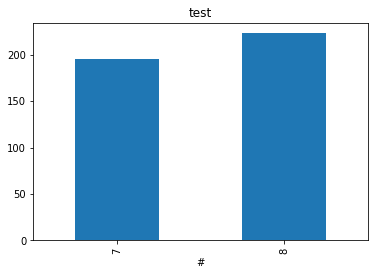

In [0]:
select_country['NewDeaths'].plot(kind="bar", title="test")

In [0]:
select_country['NewDeaths'].plot(kind="bar", title="test")